# Customer Churn Prediction and Sales
<div style="text-align: right;">
<h4>By Rishikesh M R and team (Group 9)
</div>

This Python Notebook focuses more on:
* Understanding the data,
* Exploratory Data Analysis,
* Checking for null values/ duplicate values,
* Cleaning the data, and
* Creating visualizations out of it i.e. Conducting Univariate and Bivariate Analysis. 

### Importing required libraries

In [21]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Libraries required for data preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Library required to split the data
from sklearn.model_selection import train_test_split

In [22]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 20.2 MB/s eta 0:00:08
   --- ------------------------------------ 12.3/150.0 MB 32.2 MB/s eta 0:00:05
   ----- ---------------------------------- 21.8/150.0 MB 36.2 MB/s eta 0:00:04
   -------- ------------------------------- 32.8/150.0 MB 40.8 MB/s eta 0:00:03
   ----------- ---------------------------- 44.8/150.0 MB 43.9 MB/s eta 0:00:03
   -------------- ------------------------- 55.8/150.0 MB 45.6 MB/s eta 0:00:03
   ---------------- ----------------------- 61.3/150.0 MB 43.4 MB/s eta 0:00:03
   ----------------- ---------------------- 67.1/150.0 MB 40.7 MB/s eta 0:00:03
   ------------------- -------------------- 72.4/150.0 MB 39.1 MB/s eta 0:00:02
   -------------------- ------------------- 76.8/150.0 MB 37.4 MB/s eta 0:00:02
   ---------------------- ----------------- 82.6/150.0 MB 36.1 MB/s eta 0:00:02
   ----------------------- ---------------- 87.6/1

In [23]:
# Libraries required to build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# Libraries required for hyperparameter tuning
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    cross_val_score,
    StratifiedKFold,
)

# Libraries to get different metric scores
# from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)

In [24]:
# Library required to suppress any warning messages

import warnings

warnings.filterwarnings("ignore")

# Libraries required for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)  # adds background to the graph

# Remove the limit for number of displayed rows and columns
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.2f" % x)

### Loading the dataset

<b>Google drive of excel file for your reference</b>

https://docs.google.com/spreadsheets/d/1x9gJUNZQ4cOQpgE_oZ8KIJXVcX3xWw9z/edit?usp=sharing&ouid=118278145072997996979&rtpof=true&sd=true

In [61]:
path = 'Customer_Churn_Data.xlsx'
customer_churn_data = pd.read_excel(path, sheet_name="E_Comm_Data",)
customer_churn_column_data = pd.read_excel(path, sheet_name="Meta_Data",)

In [29]:
# Vivewing the dataset
customer_churn_data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.00,6.00,Debit Card,Female,3.00,3,Super,2.00,Single,9,1.00,11,1,5,159.93,Mobile
1,20001,1,0,1.00,8.00,UPI,Male,3.00,4,Regular Plus,3.00,Single,7,1.00,15,0,0,120.90,Mobile
2,20002,1,0,1.00,30.00,Debit Card,Male,2.00,4,Regular Plus,3.00,Single,6,1.00,14,0,3,NaN,Mobile
3,20003,1,0,3.00,15.00,Debit Card,Male,2.00,4,Super,5.00,Single,8,0.00,23,0,3,134.07,Mobile
4,20004,1,0,1.00,12.00,Credit Card,Male,2.00,3,Regular Plus,5.00,Single,3,0.00,11,1,3,129.60,Mobile


### Understanding the dataset

In [37]:
# Understanding of attributes in the dataset
customer_churn_column_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Variable,Description
1,NaN,AccountID,account unique identifier
2,NaN,Churn,account churn flag (Target)
3,NaN,Tenure,Tenure of account
4,NaN,City_Tier,Tier of primary customer's city
5,NaN,CC_Contacted_L12m,How many times all the customers of the accoun...
6,NaN,Payment,Preferred Payment mode of the customers in the...
7,NaN,Gender,Gender of the primary customer of the account
8,NaN,Service_Score,Satisfaction score given by customers of the a...
9,NaN,Account_user_count,Number of customers tagged with this account


In [65]:
# creating a copy of the dataset
data = customer_churn_data.copy()

In [67]:
# Checking the number of rows and columns in the data
data.shape

(11260, 19)

In [43]:
#Viewing 10 random observations from the dataset
data.sample(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1152,21152,0,19,1.00,8.00,Credit Card,Male,2.00,3,Regular,1.00,Married,8,1.00,17,1,2,293.28,Mobile
9011,29011,0,14,1.00,21.00,Credit Card,Male,3.00,4,Regular Plus,4.00,Married,12,1.00,16,1,1,163.17,Computer
5164,25164,0,1,1.00,14.00,UPI,Male,4.00,2,Regular +,5.00,Single,+,NaN,13,1,8,160.78,Mobile
4386,24386,0,11,3.00,11.00,E wallet,Male,3.00,4,Regular Plus,1.00,Married,6,0.00,18,4,9,152.93,Computer
11067,31067,0,20,1.00,11.00,Credit Card,Male,3.00,4,Regular,1.00,Married,9,1.00,19,3,3,325.28,Mobile
9185,29185,0,4,3.00,42.00,Debit Card,Male,4.00,4,Super,5.00,Married,14,0.00,22,2,4,166.15,Mobile
3588,23588,0,17,1.00,10.00,Debit Card,Male,4.00,6,Regular,2.00,Divorced,5,0.00,15,2,8,322.40,Mobile
1011,21011,1,0,1.00,30.00,Credit Card,NaN,2.00,3,Regular Plus,4.00,Married,2,1.00,17,0,0,1803,Mobile
450,20450,0,27,1.00,25.00,Credit Card,Female,3.00,3,Super,5.00,Married,10,1.00,11,0,4,NaN,Mobile
1559,21559,1,0,1.00,9.00,Cash on Delivery,Female,2.00,3,Regular Plus,5.00,Single,6,1.00,11,0,4,126.57,Mobile


In [45]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

## Exploratory Data Analysis(EDA)

#### 1. Checking for duplicated values

In [47]:
data.duplicated().sum()

0

#### 2. Checking for the number of missing values in the dataset

In [57]:
MissingValues = [data.isnull().sum()] + ['--------------------------------------'] + [ data.isnull().sum() / data.isnull().count() * 100]
MissingValues

[Churn                        0
 Tenure                     102
 City_Tier                  112
 CC_Contacted_LY            102
 Payment                    109
 Gender                     108
 Service_Score               98
 Account_user_count         112
 account_segment             97
 CC_Agent_Score             116
 Marital_Status             212
 rev_per_month              102
 Complain_ly                357
 rev_growth_yoy               0
 coupon_used_for_payment      0
 Day_Since_CC_connect       357
 cashback                   471
 Login_device               221
 dtype: int64,
 '--------------------------------------',
 Churn                     0.00
 Tenure                    0.91
 City_Tier                 0.99
 CC_Contacted_LY           0.91
 Payment                   0.97
 Gender                    0.96
 Service_Score             0.87
 Account_user_count        0.99
 account_segment           0.86
 CC_Agent_Score            1.03
 Marital_Status            1.88
 rev_per_month

#### 3. Checking the number of unique values in each column

In [53]:
data.nunique()

Churn                         2
Tenure                       38
City_Tier                     3
CC_Contacted_LY              44
Payment                       5
Gender                        4
Service_Score                 6
Account_user_count            7
account_segment               7
CC_Agent_Score                5
Marital_Status                3
rev_per_month                59
Complain_ly                   2
rev_growth_yoy               20
coupon_used_for_payment      20
Day_Since_CC_connect         24
cashback                   5693
Login_device                  3
dtype: int64

### Data Cleaning and Pre-processing	
a) Removal of unwanted variables<br>
b) Missing Value treatment <br>
d) Outlier treatment <br>
e) Variable transformation <br>
f) Addition of new variables <br>

##### Removal of unwanted variables

In [69]:
# data.drop(['AccountID'], axis=1)
data.drop("AccountID",axis=1,inplace=True)

In [71]:
data.shape

(11260, 18)

The data has 11260 observations with 18 variables, of which there are a few nulls in some of the variables' observations. The independent variables have both numerical and categorical data, and the churn variable is considered the target variable. <br><br>The table below describes the numerical data with a few necessary details:

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
City_Tier,11148.00,1.65,0.92,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11158.00,17.87,8.85,4.00,11.00,16.00,23.00,132.00
Service_Score,11162.00,2.90,0.73,0.00,2.00,3.00,3.00,5.00
CC_Agent_Score,11144.00,3.07,1.38,1.00,2.00,3.00,4.00,5.00
Complain_ly,10903.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00


<h3>Missing Value treatment, Outlier treatment, Variable transformation and Addition of new variables for all of the below attributes

In [75]:
data.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

Hence, Churn, rev_growth_yoy, and coupon_used_for_payment has no null values

<h4>Tenure

In [80]:
data.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [82]:
data.Tenure.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Tenure
1     12.1%
0     11.0%
8      4.7%
9      4.4%
7      4.0%
10     3.8%
3      3.7%
5      3.6%
4      3.6%
11     3.5%
6      3.3%
12     3.2%
13     3.2%
2      3.2%
14     3.1%
15     2.8%
16     2.6%
19     2.4%
18     2.3%
20     1.9%
17     1.9%
21     1.5%
23     1.5%
22     1.4%
24     1.3%
28     1.2%
30     1.2%
27     1.2%
99     1.2%
26     1.1%
#      1.0%
25     1.0%
29     1.0%
31     0.9%
50     0.0%
60     0.0%
51     0.0%
61     0.0%
Name: proportion, dtype: object

In [84]:
#transform and fill null values
data['Tenure'].replace({'#':1}, inplace=True)
data["Tenure"].fillna(1, inplace = True)

<h4>City_Tier

In [86]:
data.City_Tier.unique()

array([ 3.,  1., nan,  2.])

In [88]:
data.City_Tier.value_counts()

City_Tier
1.00    7263
3.00    3405
2.00     480
Name: count, dtype: int64

In [90]:
#filling null values
data["City_Tier"].fillna(1, inplace = True)
data.City_Tier.unique()

array([3., 1., 2.])

<h4>CC_Contacted_LY

In [92]:
data.CC_Contacted_LY.unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [94]:
#Finding the mean value
data.CC_Contacted_LY.mean()

17.867090876501166

In [96]:
#filling null values
data["CC_Contacted_LY"].fillna(17, inplace = True)
data.CC_Contacted_LY.unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

<h4>Payment

In [98]:
data.Payment.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [100]:
data.Payment.value_counts()

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64

In [102]:
#filling null values
data["Payment"].fillna('Debit Card', inplace = True)
data.Payment.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [104]:
data.Payment.value_counts()

Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64

<h4>Gender

In [106]:
data.Gender.unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [108]:
data.Gender.value_counts()

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

In [110]:
#  Variable transformation and Removal of unwanted variables : Because Female and F, Male and M are the same entity, they have been merged as F as Female and M as Male.
data["Gender"] = data["Gender"].replace("F", "Female")
data["Gender"] = data["Gender"].replace("M", "Male")

In [112]:
#filling null values
data["Gender"].fillna('Male', inplace = True)
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [114]:
data.Gender.value_counts()

Gender
Male      6812
Female    4448
Name: count, dtype: int64

<h4>Service_Score

In [116]:
data.Service_Score.unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [118]:
data.Service_Score.value_counts()

Service_Score
3.00    5490
2.00    3251
4.00    2331
1.00      77
0.00       8
5.00       5
Name: count, dtype: int64

In [120]:
data.Service_Score.mean()

2.9025264289553845

In [122]:
#filling null values
data["Service_Score"].fillna(3, inplace = True)
data.Service_Score.unique()

array([3., 2., 1., 0., 4., 5.])

<h4>Account_user_count

In [124]:
data.Account_user_count .unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [126]:
data.Account_user_count.value_counts()

Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: count, dtype: int64

In [128]:
# filling null values
data["Account_user_count"].fillna(4, inplace = True)
# Variable transformation
data['Account_user_count'].replace({'@':4}, inplace=True)

In [130]:
#after filling null values and transforming Variables
data.Account_user_count .unique()

array([3, 4, 5, 2, 1, 6], dtype=int64)

In [132]:
data.Account_user_count.value_counts()

Account_user_count
4    5013
3    3261
5    1699
2     526
1     446
6     315
Name: count, dtype: int64

<h4>account_segment

In [134]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [136]:
data.account_segment.value_counts()

account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64

Variable transformation and Removal of unwanted variables : Because Regular plus and Regular +, Super Plus and Super + are the same entity, they have been merge.

In [139]:
data["account_segment"] = data["account_segment"].replace("Regular +", "Regular Plus")
data["account_segment"] = data["account_segment"].replace("Super +", "Super Plus")

In [141]:
#filling null values
data["account_segment"].fillna('Super', inplace = True)
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus'],
      dtype=object)

In [143]:
data.account_segment.value_counts()

account_segment
Super           4159
Regular Plus    4124
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64

<h4>CC_Agent_Score

In [145]:
data.CC_Agent_Score.unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [147]:
data.CC_Agent_Score.value_counts()

CC_Agent_Score
3.00    3360
1.00    2302
5.00    2191
4.00    2127
2.00    1164
Name: count, dtype: int64

In [149]:
#filling null values
data["CC_Agent_Score"].fillna(3, inplace = True)
data.CC_Agent_Score.unique()

array([2., 3., 5., 4., 1.])

In [151]:
data.CC_Agent_Score.value_counts()

CC_Agent_Score
3.00    3476
1.00    2302
5.00    2191
4.00    2127
2.00    1164
Name: count, dtype: int64

<h4>Marital_Status

In [153]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [155]:
data.Marital_Status.value_counts()

Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: count, dtype: int64

In [157]:
#filling null values
data["Marital_Status"].fillna('Married', inplace = True)
data.Marital_Status.value_counts()

Marital_Status
Married     6072
Single      3520
Divorced    1668
Name: count, dtype: int64

In [159]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

<h4>rev_per_month

In [161]:
data.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [174]:
data.rev_per_month.value_counts()

rev_per_month
3      2537
2      1585
5      1337
4      1218
6      1085
7       754
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
124       5
107       5
123       5
140       4
118       4
129       4
133       4
136       4
117       3
108       3
101       3
116       3
110       3
137       3
119       3
115       3
138       3
130       3
126       3
113       3
127       3
19        2
139       2
120       2
131       2
22        2
125       2
121       2
105       2
114       2
134       2
20        1
23        1
122       1
104       1
21        1
25        1
135       1
111       1
109       1
100       1
103       1
Name: count, dtype: int64

In [170]:
#filling null values
data["rev_per_month"].fillna(3, inplace = True)
#  Variable transformation
data['rev_per_month'].replace({'+':3}, inplace=True)

In [172]:
#after filling null values and transforming Variables
data.rev_per_month.unique()

array([  9,   7,   6,   8,   3,   2,   4,  10,   1,   5, 130,  19, 139,
       102, 120, 138, 127, 123, 124, 116,  21, 126, 134, 113, 114, 108,
       140, 133, 129, 107, 118,  11, 105,  20, 119, 121, 137, 110,  22,
       101, 136, 125,  14,  13,  12, 115,  23, 122, 117, 131, 104,  15,
        25, 135, 111, 109, 100, 103], dtype=int64)

<h4>Complain_ly

In [176]:
data.Complain_ly.unique()

array([ 1.,  0., nan])

In [178]:
data.Complain_ly.value_counts()

Complain_ly
0.00    7792
1.00    3111
Name: count, dtype: int64

In [180]:
#filling null values
data["Complain_ly"].fillna(0, inplace = True)
data.Complain_ly.unique()

array([1., 0.])

In [182]:
data.Complain_ly.value_counts()

Complain_ly
0.00    8149
1.00    3111
Name: count, dtype: int64

<h4>rev_growth_yoy

In [184]:
data.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [186]:
data.rev_growth_yoy.value_counts()

rev_growth_yoy
14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: count, dtype: int64

In [188]:
#  Variable transformation
data['rev_growth_yoy'].replace({'$':14}, inplace=True)
data.rev_growth_yoy.value_counts()

rev_growth_yoy
14    1527
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
4        3
Name: count, dtype: int64

<h4>coupon_used_for_payment

In [190]:
data.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [192]:
data.coupon_used_for_payment.value_counts()

coupon_used_for_payment
1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: count, dtype: int64

In [194]:
#  Variable transformation
data['coupon_used_for_payment'].replace({'#':1}, inplace=True)
data['coupon_used_for_payment'].replace({'$':1}, inplace=True)
data['coupon_used_for_payment'].replace({'*':1}, inplace=True)

In [196]:
#After variable transformation
data.coupon_used_for_payment.unique()

array([ 1,  0,  4,  2,  9,  6, 11,  7, 12, 10,  5,  3, 13, 15,  8, 14, 16],
      dtype=int64)

In [198]:
data.coupon_used_for_payment.value_counts()

coupon_used_for_payment
1     4376
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
Name: count, dtype: int64

<h4>Day_Since_CC_connect

In [200]:
data.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [202]:
data.Day_Since_CC_connect.value_counts()

Day_Since_CC_connect
3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: count, dtype: int64

In [204]:
# Variable transformation
data['Day_Since_CC_connect'].replace({'$':3}, inplace=True)
# filling null values
data["Day_Since_CC_connect"].fillna(3, inplace = True)

In [206]:
data.Day_Since_CC_connect.unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [208]:
data.Day_Since_CC_connect.value_counts()

Day_Since_CC_connect
3.00     2174
2.00     1574
1.00     1256
8.00     1169
0.00      964
7.00      911
4.00      893
9.00      622
5.00      479
10.00     339
6.00      229
11.00     183
12.00     146
13.00     117
14.00      74
15.00      37
17.00      34
16.00      26
18.00      26
30.00       2
31.00       2
47.00       2
46.00       1
Name: count, dtype: int64

<h4>cashback

In [210]:
data.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [212]:
data.cashback.value_counts()

cashback
155.62    10
149.36     9
154.73     9
145.08     9
149.68     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: count, Length: 5693, dtype: int64

In [214]:
# Variable transformation
data['cashback'].replace({'$':152}, inplace=True)
# filling null values
data["cashback"].fillna(152, inplace = True)

In [216]:
data.cashback.unique()

array([159.93, 120.9 , 152.  , ..., 227.36, 226.91, 191.42])

In [218]:
data.cashback.value_counts()

cashback
152.00    476
155.62     10
149.36      9
149.68      9
154.73      9
         ... 
131.55      1
245.64      1
130.78      1
299.72      1
191.42      1
Name: count, Length: 5692, dtype: int64

<h4>Login_device

In [220]:
data.Login_device.unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [222]:
data.Login_device.value_counts()

Login_device
Mobile      7482
Computer    3018
&&&&         539
Name: count, dtype: int64

In [224]:
#  Variable transformation
data['Login_device'].replace({'&&&&':'others'}, inplace=True)

#  Filling null values
data["Login_device"].fillna('Mobile', inplace = True)

In [226]:
data.Login_device.unique()

array(['Mobile', 'Computer', 'others'], dtype=object)

In [228]:
data.Login_device.value_counts()

Login_device
Mobile      7703
Computer    3018
others       539
Name: count, dtype: int64

<h4>Checking for null values after Variable transformation, handling missing and eleminating null values

In [230]:
data.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [232]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,11260.00,10.83,12.83,0.00,2.00,8.00,16.00,99.00
City_Tier,11260.00,1.65,0.91,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11260.00,17.86,8.81,4.00,11.00,16.00,23.00,132.00
Service_Score,11260.00,2.90,0.72,0.00,2.00,3.00,3.00,5.00
Account_user_count,11260.00,3.70,1.00,1.00,3.00,4.00,4.00,6.00
CC_Agent_Score,11260.00,3.07,1.37,1.00,2.00,3.00,4.00,5.00
rev_per_month,11260.00,6.13,11.52,1.00,3.00,4.00,7.00,140.00
Complain_ly,11260.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
rev_growth_yoy,11260.00,16.19,3.76,4.00,13.00,15.00,19.00,28.00


### Univariate Analysis

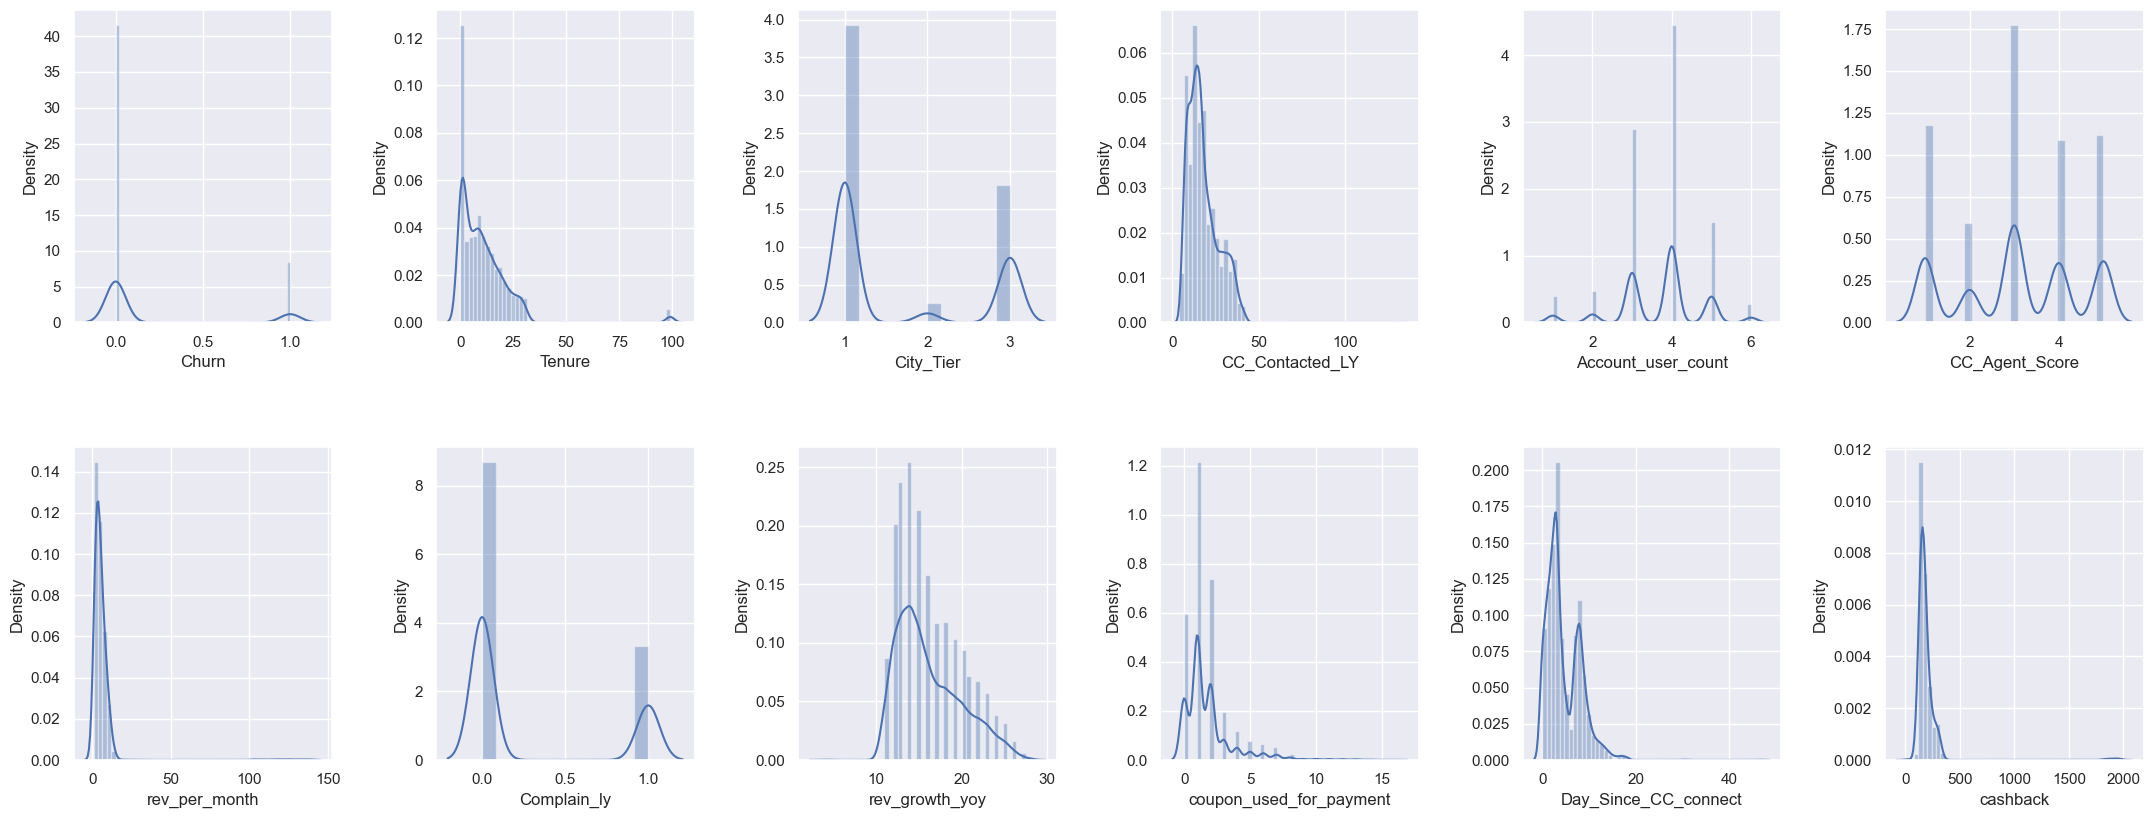

In [234]:
plt.figure(figsize=(23,5))
plt.subplot(2, 6, 1)
sns.distplot(data['Churn'])

plt.subplot(2, 6, 2)
sns.distplot(data['Tenure'])

plt.subplot(2, 6, 3)
sns.distplot(data['City_Tier'])

plt.subplot(2, 6, 4)
sns.distplot(data['CC_Contacted_LY'])

plt.subplot(2, 6, 5)
sns.distplot(data['Account_user_count'])

plt.subplot(2, 6, 6)
sns.distplot(data['CC_Agent_Score'])

plt.subplot(2, 6, 7)
sns.distplot(data['rev_per_month'])

plt.subplot(2, 6, 8)
sns.distplot(data['Complain_ly'])

plt.subplot(2, 6, 9)
sns.distplot(data['rev_growth_yoy'])

plt.subplot(2, 6, 10)
sns.distplot(data['coupon_used_for_payment'])

plt.subplot(2, 6, 11)
sns.distplot(data['Day_Since_CC_connect'])

plt.subplot(2, 6, 12)
sns.distplot(data['cashback'])

plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=1,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

Given below are the Categorical Variables:

Payment<br>
Gender<br>
account_segment<br>
Marital_Status<br>
Login_device<br>

In [244]:
# summary of the categorical variables

data.describe(include="object").T

,count,unique,top,freq
Payment,11260,5,Debit Card,4696
Gender,11260,2,Male,6812
account_segment,11260,5,Super,4159
Marital_Status,11260,3,Married,6072
Login_device,11260,3,Mobile,7703


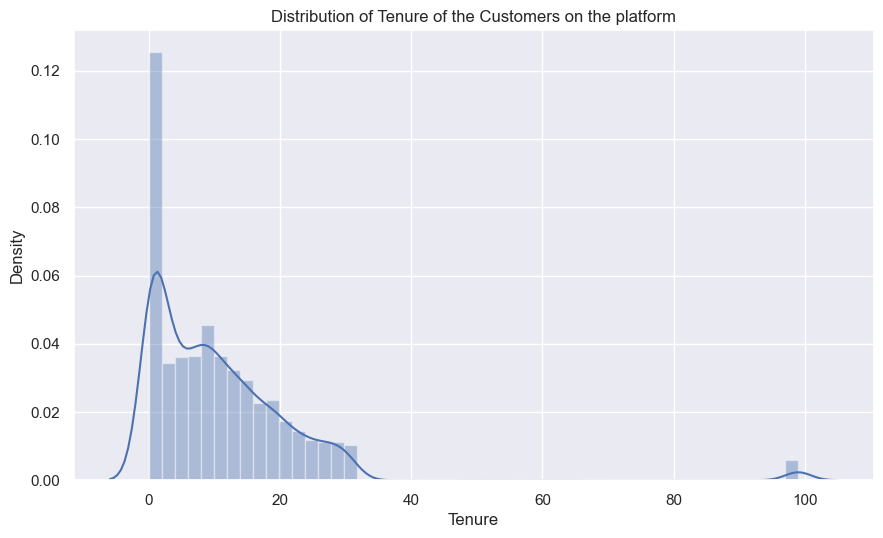

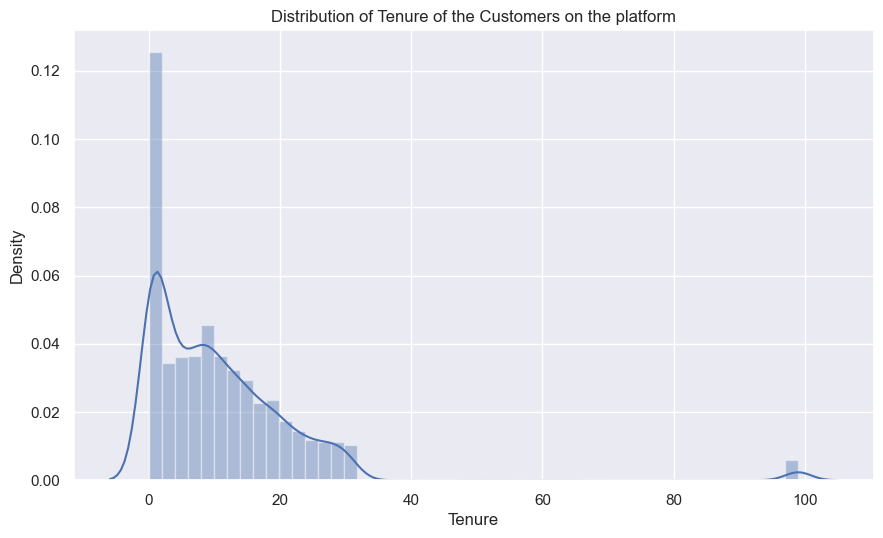

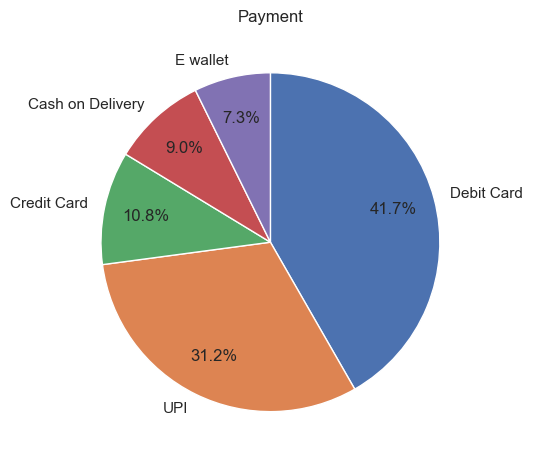

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])

plt.figure(figsize=(10,5))
plt.title("Distribution of Tenure of the Customers on the platform")
sns.distplot(data['Tenure'])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)

#compute data for plotting
labels = data['Payment'].unique()
values = data.Payment.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Payment')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

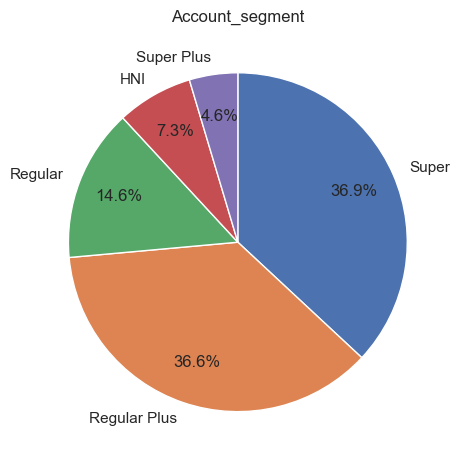

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])



#compute data for plotting
labels = data['account_segment'].unique()
values = data.account_segment.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Account_segment')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

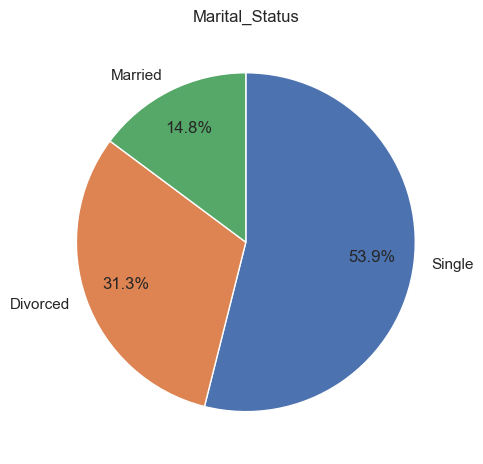

In [254]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])


#compute data for plotting
labels = data['Marital_Status'].unique()
values = data.Marital_Status.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Marital_Status')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

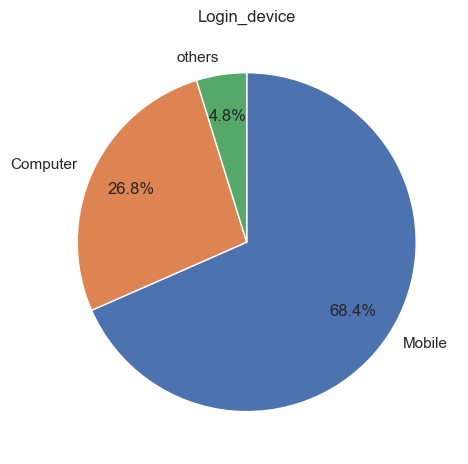

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])



#compute data for plotting
labels = data['Login_device'].unique()
values = data.Login_device.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Login_device')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

### Bivariate Analysis

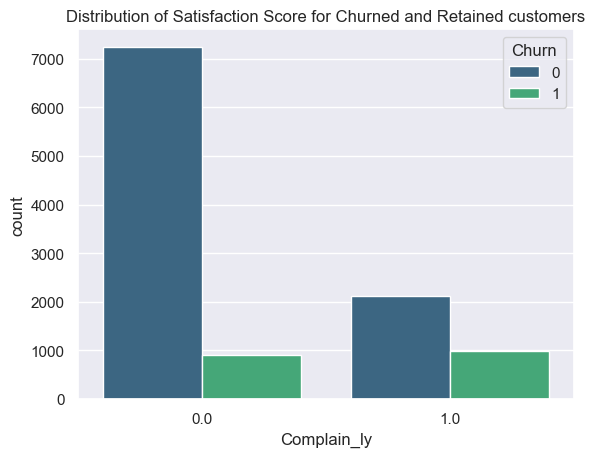

In [261]:
# Defining a method to plot stacked bar plot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data : dataframe
    predictor : independent variable
    target : target variable

    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="lower left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

sns.countplot(x='Complain_ly', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

Churn      0     1    All
Tenure                   
 All    9364  1896  11260
1.00     851   718   1569
0.00     562   669   1231
3.00     367    43    410
4.00     360    43    403
7.00     418    32    450
2.00     322    32    354
20.00    187    30    217
5.00     373    30    403
8.00     490    29    519
10.00    396    27    423
14.00    320    25    345
13.00    334    25    359
99.00    107    24    131
19.00    249    24    273
9.00     475    21    496
15.00    291    20    311
21.00    150    20    170
11.00    368    20    388
16.00    272    19    291
6.00     348    15    363
12.00    347    13    360
18.00    242    11    253
17.00    209     6    215
30.00    137     0    137
61.00      2     0      2
60.00      2     0      2
51.00      2     0      2
50.00      2     0      2
31.00     96     0     96
26.00    122     0    122
29.00    114     0    114
28.00    137     0    137
27.00    131     0    131
25.00    114     0    114
24.00    147     0    147
22.00    151

<Figure size 1000x500 with 0 Axes>

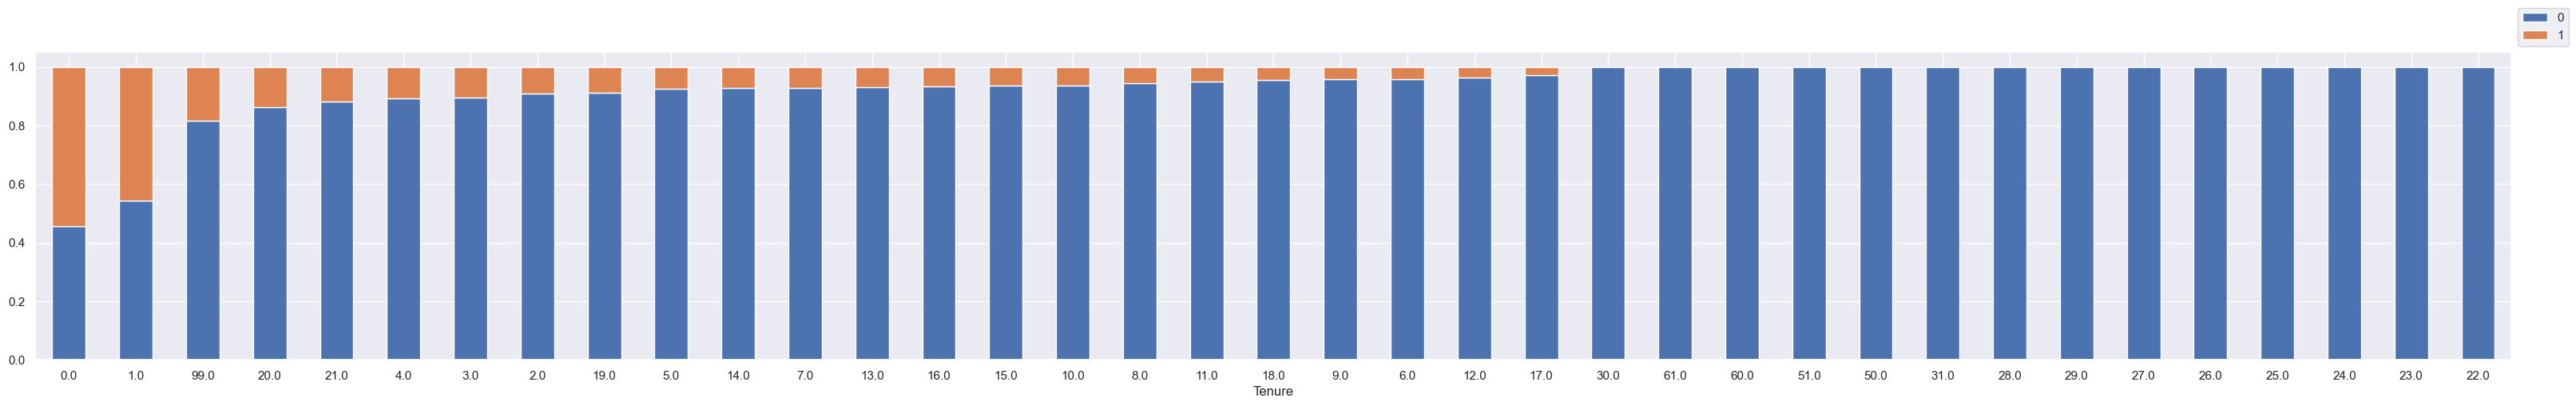

In [263]:
# 2. Target(Churn) vs Tenure
#set chart title
plt.figure(figsize=(10,5))
stacked_barplot(data, "Tenure", "Churn")

Complain_ly  0.00  1.00    All
Churn                         
All          8149  3111  11260
0            7241  2123   9364
1             908   988   1896


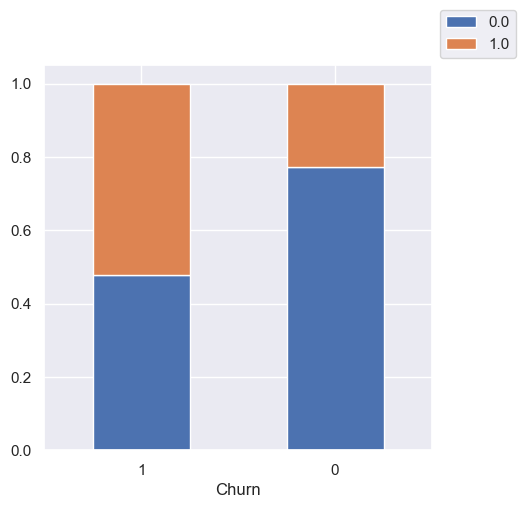

In [269]:
# 3. Target(Churn) vs Complains in a year
#set chart title

stacked_barplot(data, "Churn", "Complain_ly")

Churn                0     1    All
Payment                            
All               9364  1896  11260
Debit Card        3972   724   4696
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822


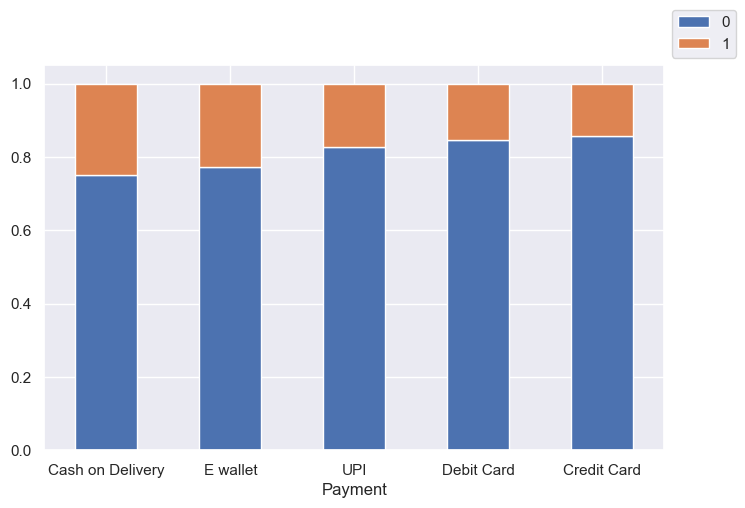

In [271]:
# 4. Target(Churn) vs Payment
stacked_barplot(data, "Payment", "Churn")

Churn            0     1    All
Login_device                   
All           9364  1896  11260
Mobile        6489  1214   7703
Computer      2421   597   3018
others         454    85    539


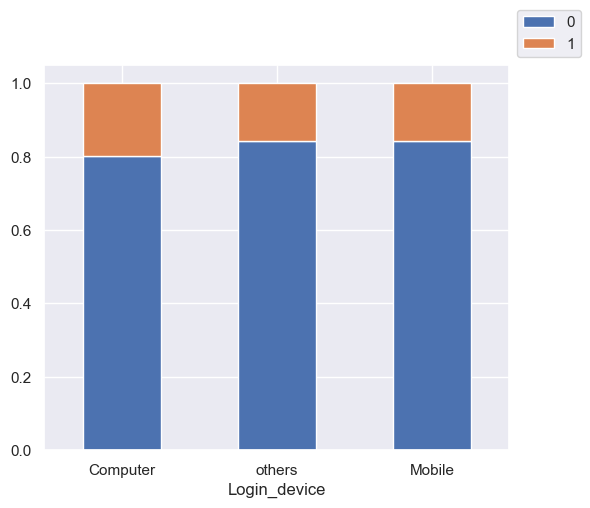

In [273]:
# 5. Target(Churn) vs Login_device
stacked_barplot(data, "Login_device", "Churn")

Churn              0     1    All
CC_Agent_Score                   
 All            9364  1896  11260
3.00            2877   599   3476
5.00            1669   522   2191
4.00            1763   364   2127
1.00            2038   264   2302
2.00            1017   147   1164


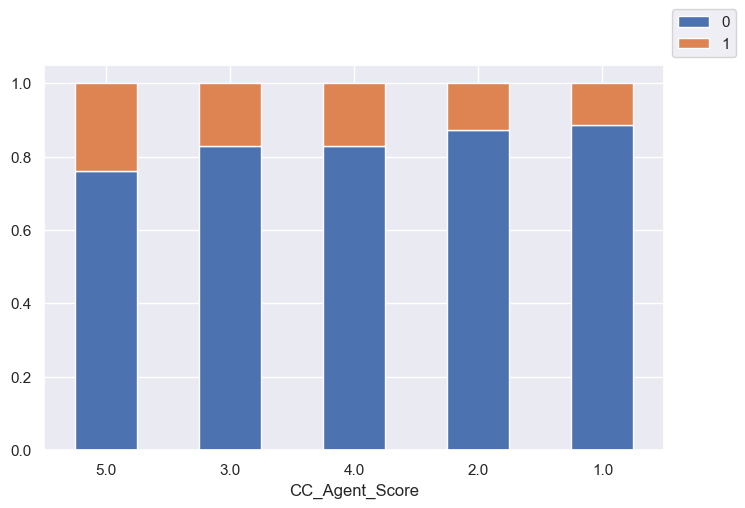

In [275]:
stacked_barplot(data, "CC_Agent_Score", "Churn")

Churn              0     1    All
Marital_Status                   
All             9364  1896  11260
Single          2573   947   3520
Married         5367   705   6072
Divorced        1424   244   1668


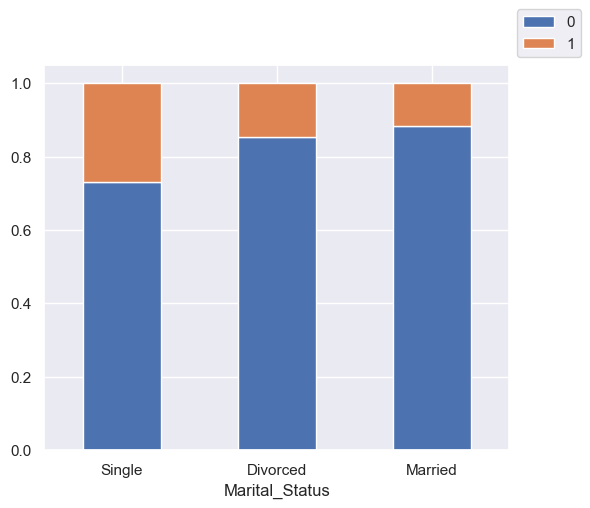

In [277]:
stacked_barplot(data, "Marital_Status", "Churn")

#### Reffer the other code file for Data Models used. This file is only for:
1. Understanding the data
2. Exploratory Data Analysis(EDA)
3. Univariate and bivariate analysis